## Optimization

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

D:\School\Programs\Anaconda\envs\pythondata\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\School\Programs\Anaconda\envs\pythondata\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\School\Programs\Anaconda\envs\pythondata\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\School\Programs\Anaconda\envs\pythondata\lib\s

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


## Attempt 1

In [2]:
# Dropped EIN, NAME and STATUS
application_df = application_df.drop(['EIN', 'NAME', 'STATUS'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1


In [3]:
#replace income values with 1 if not 0
income_to_replace = ['25000-99999', '100000-499999', '1M-5M', '1-9999', '10000-24999', '10M-50M', '5M-10M', '50M+']
for app in income_to_replace:
    application_df['INCOME_AMT'] = application_df['INCOME_AMT'].replace(app,"1")

# Check to make sure binning was successful
application_df['INCOME_AMT'].value_counts()

0    24388
1     9911
Name: INCOME_AMT, dtype: int64

In [4]:
#app types to replace
application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [5]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
#this will generate and show the entire data frame of value counts without needing to tell it value_count >1
pd.set_option('display.max_rows', 71)
cla_df = application_df.CLASSIFICATION.value_counts().to_frame()
cla_df

,CLASSIFICATION
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116
C1270,114


In [7]:
#create list of values to be changed
classifications_to_replace = application_df.CLASSIFICATION.value_counts()[application_df['CLASSIFICATION'].value_counts()< 1000].index

In [8]:
# replace CLASSIFICATION values
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
final_df = pd.get_dummies(application_df)
final_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
1,108590,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
2,5000,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
3,6692,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,142590,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [10]:
# split data

X = final_df.drop("IS_SUCCESSFUL", axis=1)
y = final_df['IS_SUCCESSFUL']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [11]:
# scale data
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
#define number of input features
number_input_features = len(X_train_scaled[0])

In [13]:
# Define the model
nn1 = tf.keras.models.Sequential()

# Layers
nn1.add(tf.keras.layers.Dense(units=80, input_dim=number_input_features, activation="relu"))
nn1.add(tf.keras.layers.Dense(units=40, activation="relu"))
nn1.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn1.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                2880      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 6,161
Trainable params: 6,161
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
nn1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Train the model
fit_model = nn1.fit(X_train_scaled, y_train, epochs=100)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.7148 - acc: 0.7065
Epoch 2/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.6361 - acc: 0.7151
Epoch 3/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5899 - acc: 0.7218
Epoch 4/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5828 - acc: 0.7217
Epoch 5/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5943 - acc: 0.7235
Epoch 6/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5820 - acc: 0.7241
Epoch 7/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5837 - acc: 0.7227
Epoch 8/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5701 - acc: 0.7250
Epoch 9/100
25724/25724 [==============================] - 1s 27us/sample - loss: 

25724/25724 [==============================] - 1s 27us/sample - loss: 0.5581 - acc: 0.7313
Epoch 77/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5544 - acc: 0.7311
Epoch 78/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5539 - acc: 0.7311
Epoch 79/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5556 - acc: 0.7321
Epoch 80/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5542 - acc: 0.7318
Epoch 81/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5568 - acc: 0.7297
Epoch 82/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5527 - acc: 0.7316
Epoch 83/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5531 - acc: 0.7305
Epoch 84/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5501 - acc: 0.7329
Epoch 85/100
25724/25724 [==============================] - 1s 27us/sample - 

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5667 - acc: 0.7279
Loss: 0.5666585820895937, Accuracy: 0.7279300093650818


## Attempt 1 Summary

For this attempt I tried decreasing the amount of features in the data set. I dropped STATUS and binned INCOME into true or false. The model accuracy increased by .002.

## Attempt 2

In [17]:
application_df2 = pd.read_csv("Resources/charity_data.csv")
application_df2.shape

(34299, 12)

In [18]:
#viewing value counts for ask price
application_df2.ASK_AMT.value_counts()

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [19]:
#viewing top ask prices
amt_val = application_df2.ASK_AMT.value_counts().index.sort_values(ascending=False)
amt_val

Int64Index([8597806340, 8556638692, 5591584994, 4653011914, 3391919220,
            2310256039, 2264109450, 1893400128, 1736232349, 1665460552,
            ...
                  5058,       5052,       5050,       5044,       5040,
                  5037,       5016,       5006,       5001,       5000],
           dtype='int64', length=8747)

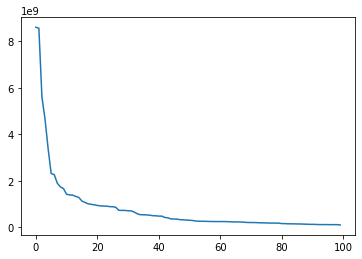

In [20]:
#visualizing top 100 asks to see fall off
plt.plot(amt_val[0:100])

In [21]:
#testing values to try and determine a cutoff point
application_df2['ASK_AMT'].value_counts(bins=50, sort=False)

(-8592801.341, 171961026.8]     34219
(171961026.8, 343917053.6]         33
(343917053.6, 515873080.4]          9
(515873080.4, 687829107.2]          6
(687829107.2, 859785134.0]          5
(859785134.0, 1031741160.8]        10
(1031741160.8, 1203697187.6]        2
(1203697187.6, 1375653214.4]        2
(1375653214.4, 1547609241.2]        3
(1547609241.2, 1719565268.0]        1
(1719565268.0, 1891521294.8]        1
(1891521294.8, 2063477321.6]        1
(2063477321.6, 2235433348.4]        0
(2235433348.4, 2407389375.2]        2
(2407389375.2, 2579345402.0]        0
(2579345402.0, 2751301428.8]        0
(2751301428.8, 2923257455.6]        0
(2923257455.6, 3095213482.4]        0
(3095213482.4, 3267169509.2]        0
(3267169509.2, 3439125536.0]        1
(3439125536.0, 3611081562.8]        0
(3611081562.8, 3783037589.6]        0
(3783037589.6, 3954993616.4]        0
(3954993616.4, 4126949643.2]        0
(4126949643.2, 4298905670.0]        0
(4298905670.0, 4470861696.8]        0
(4470861696.

In [22]:
#dropping values over 150,000,000
filtered_application_df2 = application_df2.loc[application_df2['ASK_AMT'] < 150000000]
filtered_application_df2

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [23]:
application_df2 = filtered_application_df2.drop(['EIN', 'NAME', 'STATUS'], axis=1)

application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']
for app in application_types_to_replace:
    application_df2['APPLICATION_TYPE'] = application_df2['APPLICATION_TYPE'].replace(app,"Other")
    
classifications_to_replace = application_df2.CLASSIFICATION.value_counts()[application_df2['CLASSIFICATION'].value_counts()< 1000].index
for cls in classifications_to_replace:
    application_df2['CLASSIFICATION'] = application_df2['CLASSIFICATION'].replace(cls,"Other")
    
income_to_replace = ['25000-99999', '100000-499999', '1M-5M', '1-9999', '10000-24999', '10M-50M', '5M-10M', '50M+']
for inc in income_to_replace:
    application_df2['INCOME_AMT'] = application_df2['INCOME_AMT'].replace(inc,"1")
    
final_df2 = pd.get_dummies(application_df2)
final_df2.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
1,108590,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
2,5000,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
3,6692,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
4,142590,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [24]:
#split
X = final_df2.drop("IS_SUCCESSFUL", axis=1)
y = final_df2['IS_SUCCESSFUL']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [25]:
#scaler
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
#define number of input features
number_input_features = len(X_train_scaled[0])

In [27]:
# Define the model
nn2 = tf.keras.models.Sequential()

# Layers
nn2.add(tf.keras.layers.Dense(units=80, input_dim=number_input_features, activation="relu"))
nn2.add(tf.keras.layers.Dense(units=40, activation="relu"))
nn2.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                2880      
_________________________________________________________________
dense_4 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 41        
Total params: 6,161
Trainable params: 6,161
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
nn2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
# Train the model
fit_model = nn2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
25662/25662 [==============================] - 1s 31us/sample - loss: 0.6518 - acc: 0.7030
Epoch 2/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.6203 - acc: 0.6990
Epoch 3/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.6176 - acc: 0.7106
Epoch 4/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.5924 - acc: 0.7202
Epoch 5/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.5911 - acc: 0.7241
Epoch 6/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.5988 - acc: 0.7228
Epoch 7/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.5956 - acc: 0.7224
Epoch 8/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.6154 - acc: 0.7224
Epoch 9/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.6277 - acc: 0.7187
Epoch 10/100
25662/25662 [==============================] - 1s 28us/sampl

25662/25662 [==============================] - 1s 28us/sample - loss: 0.5545 - acc: 0.7333
Epoch 80/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.5539 - acc: 0.7337
Epoch 81/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.5538 - acc: 0.7340
Epoch 82/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.5570 - acc: 0.7326
Epoch 83/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.5621 - acc: 0.7316
Epoch 84/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.5635 - acc: 0.7321
Epoch 85/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.5670 - acc: 0.7330
Epoch 86/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.5578 - acc: 0.7327
Epoch 87/100
25662/25662 [==============================] - 1s 28us/sample - loss: 0.5593 - acc: 0.7333
Epoch 88/100
25662/25662 [==============================] - 1s 28us/sample - 

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8554/8554 - 0s - loss: 0.5766 - acc: 0.7387
Loss: 0.5765901436963482, Accuracy: 0.7387187480926514


## Attempt 2 Summary
For my second attempt I kept the decreased features from my previous attempt. I noticed that almost 75% of the rows were asking for 5000 yet the max ASK_AMT was almost 8.6 billion. I dropped rows with an ASK_AMT over 1.5 million and the model was again slightly more accurate.

## Attempt 3

In [31]:
# Define the model
nn3 = tf.keras.models.Sequential()

# Layers
nn3.add(tf.keras.layers.Dense(units=72, input_dim=number_input_features, activation="relu"))
nn3.add(tf.keras.layers.Dense(units=36, activation="relu"))
nn3.add(tf.keras.layers.Dense(units=12, activation="relu"))
nn3.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 72)                2592      
_________________________________________________________________
dense_7 (Dense)              (None, 36)                2628      
_________________________________________________________________
dense_8 (Dense)              (None, 12)                444       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 13        
Total params: 5,677
Trainable params: 5,677
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
nn3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Train the model
fit_model = nn3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
25662/25662 [==============================] - 1s 34us/sample - loss: 3.2715 - acc: 0.6127
Epoch 2/100
25662/25662 [==============================] - 1s 30us/sample - loss: 0.5772 - acc: 0.7223
Epoch 3/100
25662/25662 [==============================] - 1s 29us/sample - loss: 0.5715 - acc: 0.7245
Epoch 4/100
25662/25662 [==============================] - 1s 29us/sample - loss: 0.5663 - acc: 0.7251
Epoch 5/100
25662/25662 [==============================] - 1s 30us/sample - loss: 0.5641 - acc: 0.7258
Epoch 6/100
25662/25662 [==============================] - 1s 30us/sample - loss: 0.5632 - acc: 0.7262
Epoch 7/100
25662/25662 [==============================] - 1s 29us/sample - loss: 0.5566 - acc: 0.7256
Epoch 8/100
25662/25662 [==============================] - 1s 30us/sample - loss: 0.5533 - acc: 0.7277
Epoch 9/100
25662/25662 [==============================] - 1s 29us/sample - loss: 0.5530 - acc: 0.7255
Epoch 10/100
25662/25662 [==============================] - 1s 30us/sampl

25662/25662 [==============================] - 1s 29us/sample - loss: 0.5921 - acc: 0.7340
Epoch 80/100
25662/25662 [==============================] - 1s 30us/sample - loss: 0.5889 - acc: 0.7322
Epoch 81/100
25662/25662 [==============================] - 1s 29us/sample - loss: 0.5758 - acc: 0.7326
Epoch 82/100
25662/25662 [==============================] - 1s 29us/sample - loss: 0.5748 - acc: 0.7330
Epoch 83/100
25662/25662 [==============================] - 1s 29us/sample - loss: 0.5596 - acc: 0.7327
Epoch 84/100
25662/25662 [==============================] - 1s 29us/sample - loss: 0.5461 - acc: 0.7340
Epoch 85/100
25662/25662 [==============================] - 1s 29us/sample - loss: 0.5543 - acc: 0.7326
Epoch 86/100
25662/25662 [==============================] - 1s 29us/sample - loss: 0.5609 - acc: 0.7324
Epoch 87/100
25662/25662 [==============================] - 1s 30us/sample - loss: 0.5610 - acc: 0.7318
Epoch 88/100
25662/25662 [==============================] - 1s 29us/sample - 

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8554/8554 - 0s - loss: 0.5796 - acc: 0.7220
Loss: 0.579589093215058, Accuracy: 0.7220013737678528


## Attempt 3 Summary
For my third attempt I used the same filtered dataset as my previous attempt but tried adding an additional hidden layer. This resulted in accuracy decreasing over the previous 2 attempts.

In [36]:
#exporting highest scoring model
nn2.save('AlphabetSoupCharity_Optimization.h5')
